In [6]:
import pandas as pd
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [7]:
dataframe=pd.read_csv('diabetes.csv')
dataframe

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [8]:
dataframe.describe()


,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
X=dataframe.iloc[:,0:8]
Y=dataframe.iloc[:,8]
kfold=StratifiedKFold(n_splits=10,random_state=2023,shuffle=True)
model=RandomForestClassifier(n_estimators=200,random_state=20,max_depth=None)
results=cross_val_score(model,X,Y,cv=kfold)
print(results)

[0.75324675 0.79220779 0.74025974 0.77922078 0.68831169 0.74025974
 0.77922078 0.75324675 0.77631579 0.75      ]


In [10]:
print(results.mean())


0.755228981544771


# Hyper parameter tuning using GridSearchCV

In [12]:
# Use Grid Search CV to find best parameters (Hyper parameter tuning)
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(random_state=42, n_jobs=-1)


params = {
    'max_depth': [2, 3, 5, None],
    'min_samples_leaf': [5, 10, 20],
    'n_estimators': [50, 100, 200, 500],
    'max_features': ["sqrt", "log2", None],
    'criterion': ["gini", "entropy"]
}


grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv=5,
                           n_jobs=-1,
                           verbose=10,
                           scoring="accuracy")


grid_search.fit(X, Y)


Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, None],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [5, 10, 20],
                         'n_estimators': [50, 100, 200, 500]},
             scoring='accuracy', verbose=10)

In [13]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 5, 'n_estimators': 100}
0.7826160767337238


In [14]:
grid_search.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=5, max_features=None,
                       min_samples_leaf=5, n_jobs=-1, random_state=42)

# Feature selection using random forest

In [17]:
# use best estimator hyper parameters obtained above to select important features
from sklearn.ensemble import RandomForestClassifier

# Define the model with specific hyperparameters
model_best = RandomForestClassifier(criterion='entropy', 
                                    max_depth=5, 
                                    max_features=None, 
                                    min_samples_leaf=5, 
                                    n_jobs=-1, 
                                    random_state=42)


model_best.fit(X, Y)


model_best.feature_importances_


array([0.04279647, 0.44093393, 0.0396377 , 0.0225074 , 0.0251669 ,
       0.21364299, 0.08380487, 0.13150974])

In [19]:
 X = dataframe.iloc[:,0:8]
 X.columns

Index(['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age'], dtype='object')

In [25]:

df = pd.DataFrame(model_best.feature_importances_, columns=["Importance score"], index=X.columns)
df.sort_values(by="Importance score", inplace=True, ascending=False)



<BarContainer object of 8 artists>

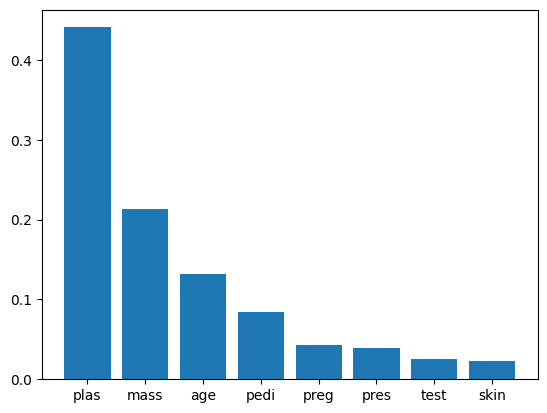

In [26]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.bar(df.index, df["Importance score"])

# Observations
- first five aare important
- last 3 are less important
- we can remove last 2
- beacuze pres is somewhat important to diabetees

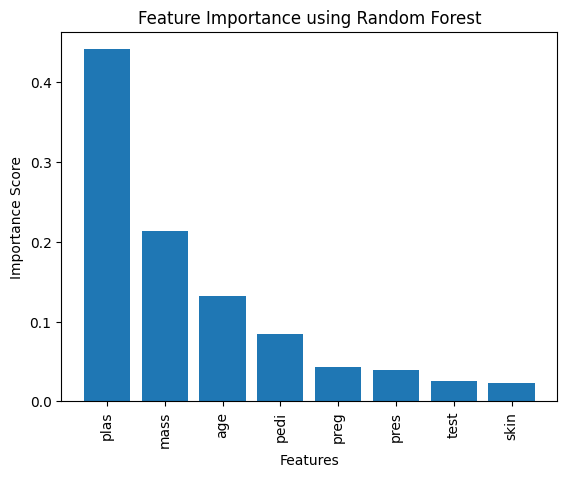

In [27]:
# Create a bar plot to visualize feature importance
plt.bar(df.index, df["Importance score"])
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Feature Importance using Random Forest")
plt.show()